The main purpose of this exercise is to look at raw data provided in an excel file, analyze the data and come up with a visualization along with patterns in the data. The data is a record of Brands that have signed up on OpenSponsorship during a particular period of time along with some brands’ demographic and behavioral attributes. Some of those brands upgraded to a paid subscription (planLevel > 0) but most didn’t. As the data analyst at OpenSponsorship, you need to explore the dataset, analyze the underlying trends, and come up with some possible factors that lead to the customer success (subscription!) AND also the possible factors that prevent them from upgrading to a paid subscription. 

In [2]:
# Import all the required libraries for data analysis 

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

# For Warnings 
import warnings 
warnings.filterwarnings('ignore')

# For Display options 
pd.set_option('display.max_rows' , None)
pd.set_option('display.max_columns' , None)



In [3]:
# read dataset. 
data_path = "../Data/sample_brands.xlsx"
data_import = pd.read_excel(data_path, sheet_name = 'data')

In [4]:
data_import.head() # Top 5 rows. 

,brand_id,created,lastActive,planLevel,num_sub_user,role,industry_categories,bantScore,companySize,onboarding_stage,country
0,1,2021-08-31 19:18:39.918,2021-08-31 19:20:37.909,0,1,brand,[],NaN,NaN,NaN,NaN
1,2,2020-08-28 04:38:10.949,2021-01-07 21:10:32.347,0,1,brand,[],NaN,NaN,4.0,United States
2,3,2020-08-21 13:55:13.203,2020-10-28 12:53:30.858,0,1,brand,[],NaN,NaN,4.0,NaN
3,4,2021-07-01 16:46:16.389,2021-07-01 16:46:59.258,0,1,founder,[],NaN,NaN,2.0,United States
4,5,2019-12-02 21:57:51.215,2019-12-20 17:35:40.591,0,1,brand,[],NaN,NaN,4.0,India


In [5]:
data_import.tail() # Last 5 rows. 

,brand_id,created,lastActive,planLevel,num_sub_user,role,industry_categories,bantScore,companySize,onboarding_stage,country
5834,5835,2020-06-26 14:48:58.887,2021-07-05 08:27:47.759,0,1,brand,['Marketing'],NaN,NaN,4.0,Kenya
5835,5836,2021-07-07 12:51:18.146,2021-09-14 19:57:02.698,0,1,founder,"['Marketing', 'Broadcasting & Media Production']",60.0,less than 10 employees,4.0,United States
5836,5837,2020-03-04 16:48:58.127,2020-03-11 10:40:34.470,0,1,brand,[],NaN,NaN,4.0,Netherlands
5837,5838,2020-10-22 20:07:04.871,2020-10-22 20:12:57.789,0,1,entrepreneur,"['Apparel & Jewelry', 'Outerwear', 'Shorts', '...",NaN,less than 10 employees,4.0,United States
5838,5839,2021-07-20 18:43:27.560,2021-07-20 18:59:44.009,0,1,founder,"['Commercial & Professional Services', 'Comme...",75.0,less than 10 employees,4.0,United Kingdom


In [6]:
# Understanding the dataset in brief. 

data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5839 entries, 0 to 5838
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   brand_id             5839 non-null   int64         
 1   created              5839 non-null   datetime64[ns]
 2   lastActive           5831 non-null   datetime64[ns]
 3   planLevel            5839 non-null   int64         
 4   num_sub_user         5839 non-null   int64         
 5   role                 5833 non-null   object        
 6   industry_categories  5816 non-null   object        
 7   bantScore            1295 non-null   float64       
 8   companySize          2406 non-null   object        
 9   onboarding_stage     5600 non-null   float64       
 10  country              4835 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(4)
memory usage: 501.9+ KB


<i>
1. Shape of dataset : 5839 X 11 <br>
2. lastActive , role , industry_categories , bantScore , companySize , onboarding_stage and country all has missing values <br>
3. role , industry_categories , companySize and country has categorical data <br>
</i>

In [7]:
# Let's figure out information about planLevel as it is one of the important column. 

print(f"Unique values in planLevel col: {data_import['planLevel'].unique()}") 



Unique values in planLevel col: [0 2 1 9 3]


In [8]:
# Data for data visualization. 

data_viz_df = data_import.copy()

#####  Plot "planLevel" for each value of it to figure out the value count of each. 

<Axes: xlabel='planLevel', ylabel='count'>

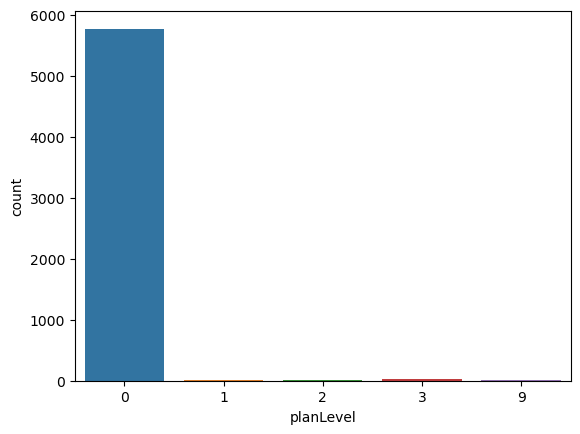

In [9]:
sns.countplot(x = 'planLevel' , data = data_viz_df)

In [10]:

data_viz_df['planLevel'].value_counts()

planLevel
0    5774
3      29
9      18
2      10
1       8
Name: count, dtype: int64


##### Observation
<i>
1. Most Brands are using the free plan i.e 5774 out of 5836 total brands. <br>
2. Only 18 brands are using the full service agency plan. <br>
</i>

In [11]:
# Let's Seperate out subscription levels in two groups i.e unsubscribed and subscribed.


subscribed_df = data_import[data_import['planLevel'] > 0]
unsubscribed_df = data_import[data_import['planLevel'] == 0] 

<Axes: xlabel='companySize', ylabel='count'>

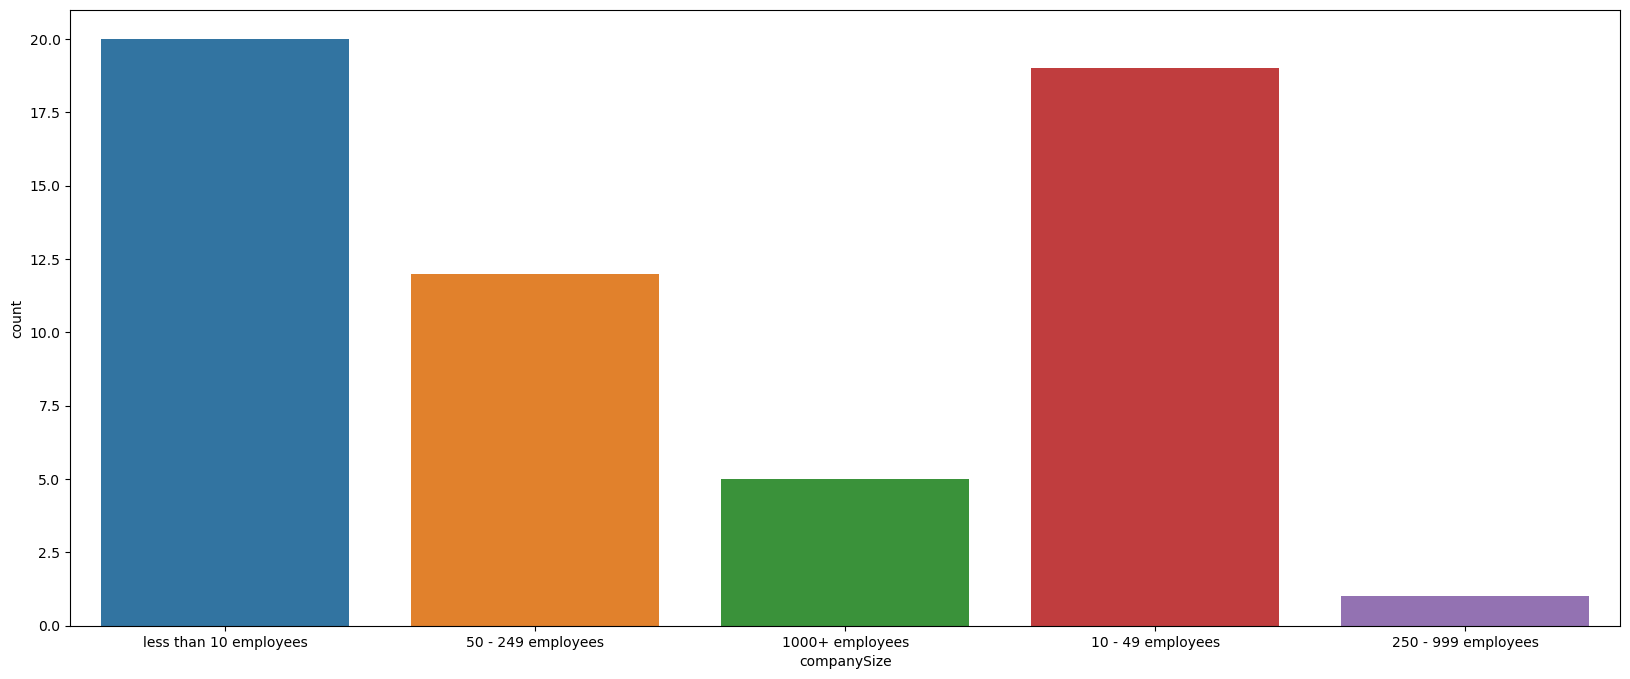

In [12]:
# Look for company size with respect to subscribed_df. 

plt.figure(figsize = (20,8))
sns.countplot(x = 'companySize' , data = subscribed_df )

<Axes: xlabel='companySize', ylabel='count'>

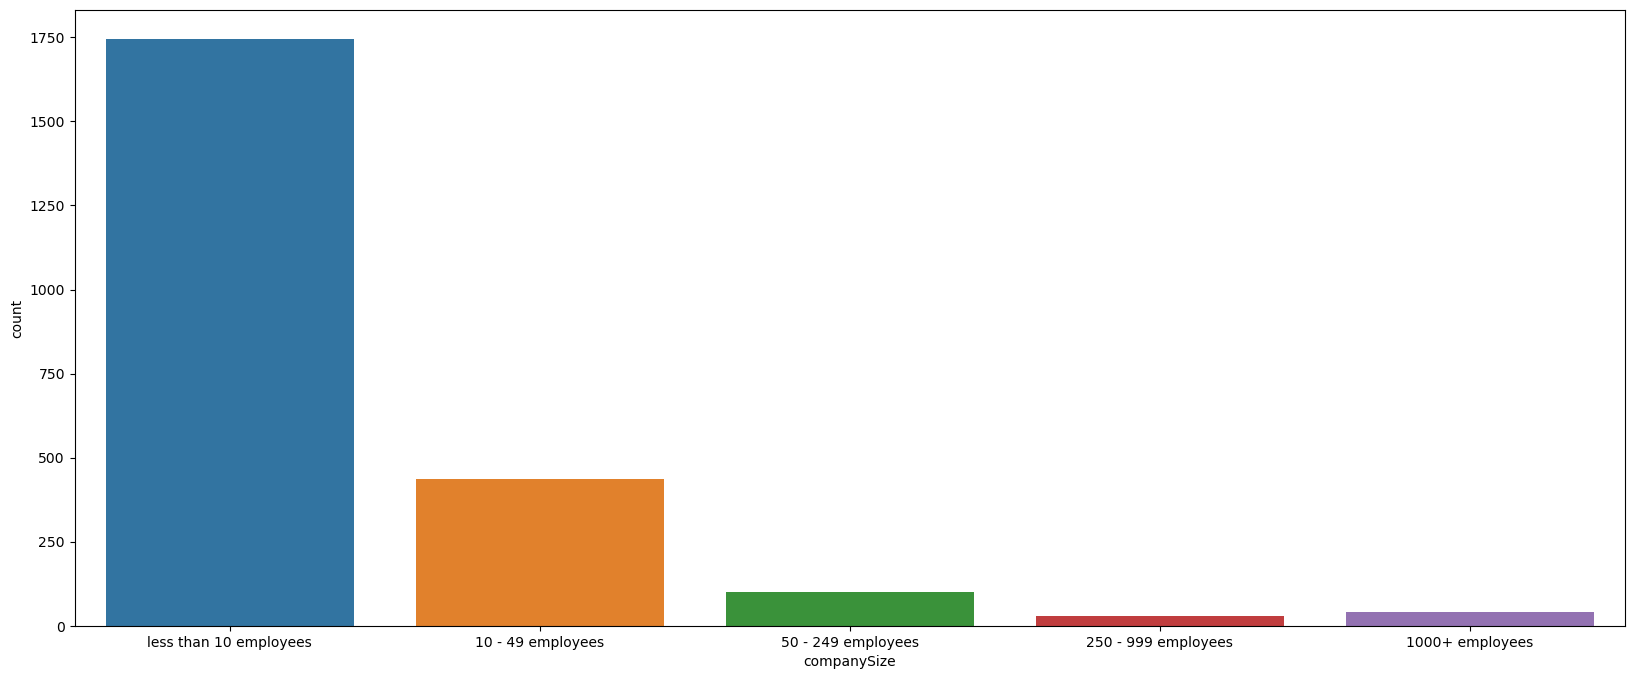

In [13]:
# Look for company size with respect to unsubscribed_df. 


plt.figure(figsize = (20,8))
sns.countplot(x = 'companySize' , data = unsubscribed_df )

#### Observation

<i>
    1. We can say brands with company size less than 10 employees prefer free plan more. <br>
    2. Mid level brands prefer subscription plan. <br>
    3. And brands with 1000+ company size also prefers free plan. <br>
</i>

##### Let's compare "bantScore" of unsubscribed vs subscribed

In [14]:
sorted(list(data_import['bantScore'].unique()))  # 100 is the highest. 

[nan,
 1.0,
 16.0,
 17.0,
 21.0,
 22.0,
 23.0,
 24.0,
 26.0,
 27.0,
 28.0,
 29.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 100.0]

<Axes: xlabel='bantScore', ylabel='Count'>

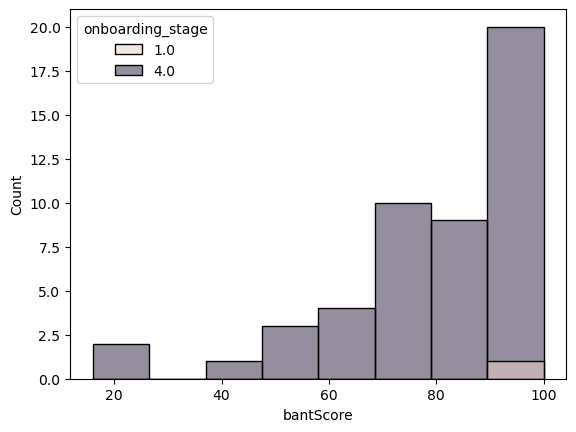

In [15]:


sns.histplot(x = 'bantScore' ,hue = 'onboarding_stage' ,  data = subscribed_df)

<Axes: xlabel='bantScore', ylabel='Count'>

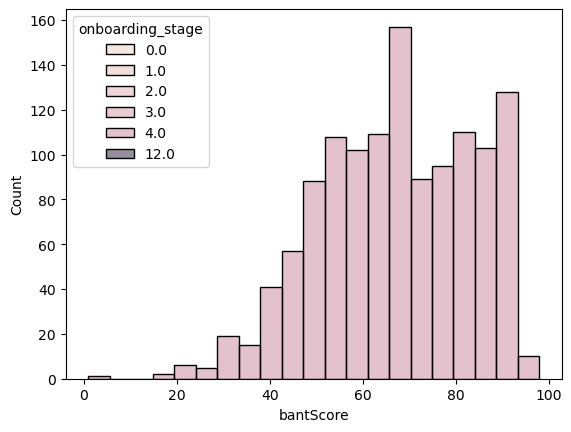

In [16]:
sns.histplot(x = 'bantScore' ,hue = 'onboarding_stage' ,  data = unsubscribed_df)

##### Observation 

<i>
1. Most brands has 'bantScore' of 100 when they are having subscribed plan , i.e 100 is the highest 'bantScore' so it is better.  <br>
2. For unsubscribed plans , 'bantScore' is distributed from 45 to 95 or more , but the count of 'bantScore' of 100 is lesser compared to subscribed <br>

</i>

In [17]:
df = data_import.copy()
df['industry_categories'] = data_import['industry_categories'].replace("[]" , "Not Known")

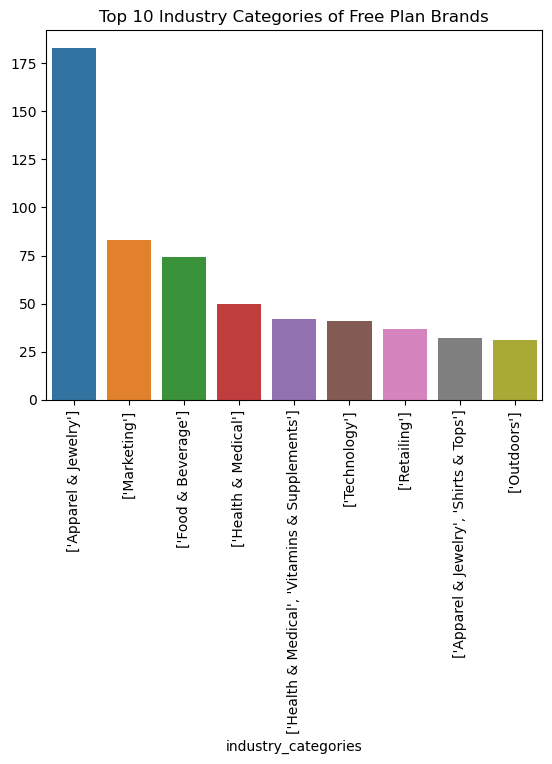

In [40]:
# Get the top N most common industry categories

N = 10 
top_n_categories = unsubscribed_df["industry_categories"].value_counts()[1:10] # Ignoring the first category as it is NA. 

# Create a bar plot for the top N categories
sns.barplot(x=top_n_categories.index, y=top_n_categories.values)
plt.title(f"Top {N} Industry Categories of Free Plan Brands")
plt.xticks(rotation=90)
plt.show()


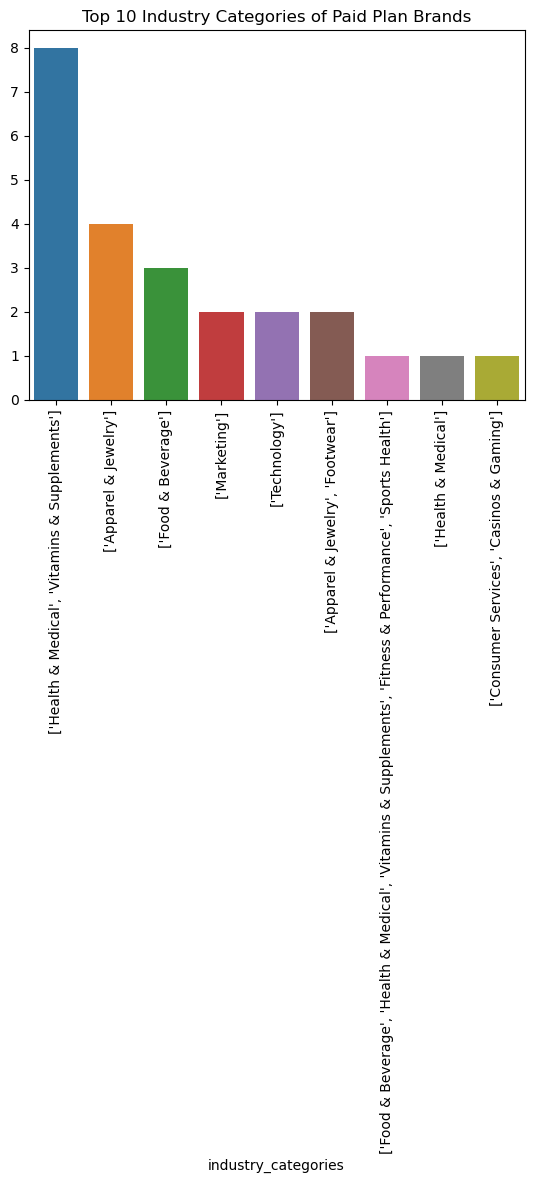

In [47]:

N = 10 
top_n_categories = subscribed_df["industry_categories"].value_counts()[1:10] # Ignoring the first category as it is NA. 

# Create a bar plot for the top N categories
sns.barplot(x=top_n_categories.index, y=top_n_categories.values)
plt.title(f"Top {N} Industry Categories of Paid Plan Brands")
plt.xticks(rotation=90)
plt.show()


##### Observation 


<i>
    1. Apparel & Jewellery , Food & beverages , marketing , retial are the major industry categories when it comes to free plan brands. <br> 
    2. Where as , health, medicine , vitamin and suppliments , food & beverages are major contributors for the subscribed plans. <br> 
    3. Which makes sense. 
</i>